In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

/tmp/ipykernel_5805/2812033396.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
df = pd.read_csv("../data/datasets/miami/miami.csv", index_col="timestamp")
df.index = pd.to_datetime(df.index, unit="s")
df.head(5)

,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_coverage,weather_category,weather_description
timestamp,,,,,,,,,,,
2023-02-28 19:00:00,30.58,31.42,1016,47,29.44,32.23,9.648,210,20,Clouds,Clouds
2023-02-28 20:00:00,30.76,31.86,1015,48,28.90,32.23,8.064,0,20,Clouds,Clouds
2023-02-28 21:00:00,30.20,32.23,1015,55,28.32,32.23,9.648,250,20,Clouds,Clouds
2023-02-28 22:00:00,29.05,30.96,1015,59,27.21,31.68,14.832,240,0,Clear,Clear
2023-02-28 23:00:00,27.45,28.85,1016,62,26.00,30.01,16.092,250,0,Clear,Clear


<Axes: xlabel='timestamp'>

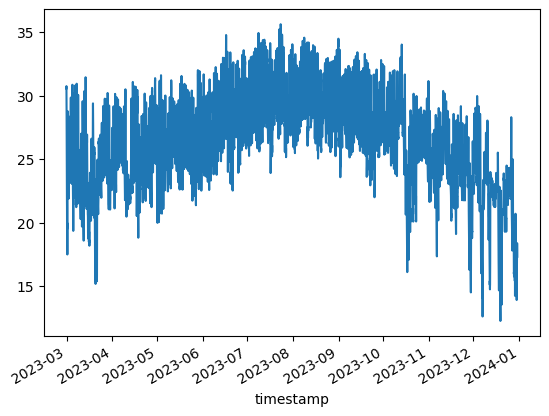

In [16]:
temp = df['temp']
temp.plot()

In [20]:
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit

cld = linear_model.ARDRegression()
split = TimeSeriesSplit(test_size=1200)
all_splits = list(split.split(temp))
for train_i, test_i in all_splits:
    train = df[train_i]
    test = test[test_i]
    cld.fit(train)
    cld.predict(train)



KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329],\n      dtype='int64', length=1330)] are in the [columns]"